In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
# Fetch stock data
start = '2010-01-01'
end = '2020-01-01'
df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351057  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.250427,100805600


In [4]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342979,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400
2515,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.250427,100805600


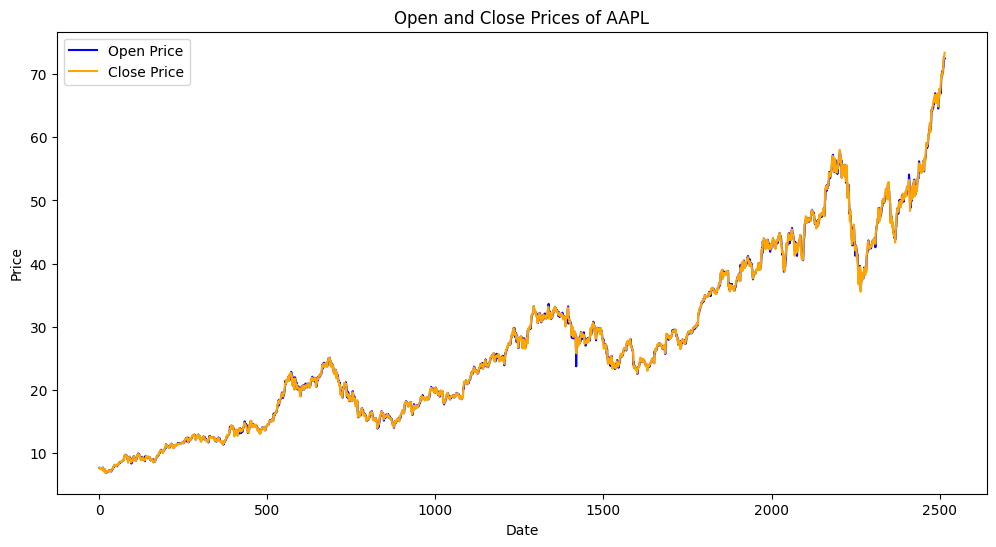

In [6]:
# Plotting the Open and Close prices
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Open Price', color='blue')
plt.plot(df['Close'], label='Close Price', color='orange')
plt.title('Open and Close Prices of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Dropping unnecessary columns
df = df.drop(['Adj Close'], axis=1)
print(df.tail())

           Date       Open       High        Low      Close     Volume
2511 2019-12-24  71.172501  71.222504  70.730003  71.067497   48478800
2512 2019-12-26  71.205002  72.495003  71.175003  72.477501   93121200
2513 2019-12-27  72.779999  73.492500  72.029999  72.449997  146266000
2514 2019-12-30  72.364998  73.172501  71.305000  72.879997  144114400
2515 2019-12-31  72.482498  73.419998  72.379997  73.412498  100805600


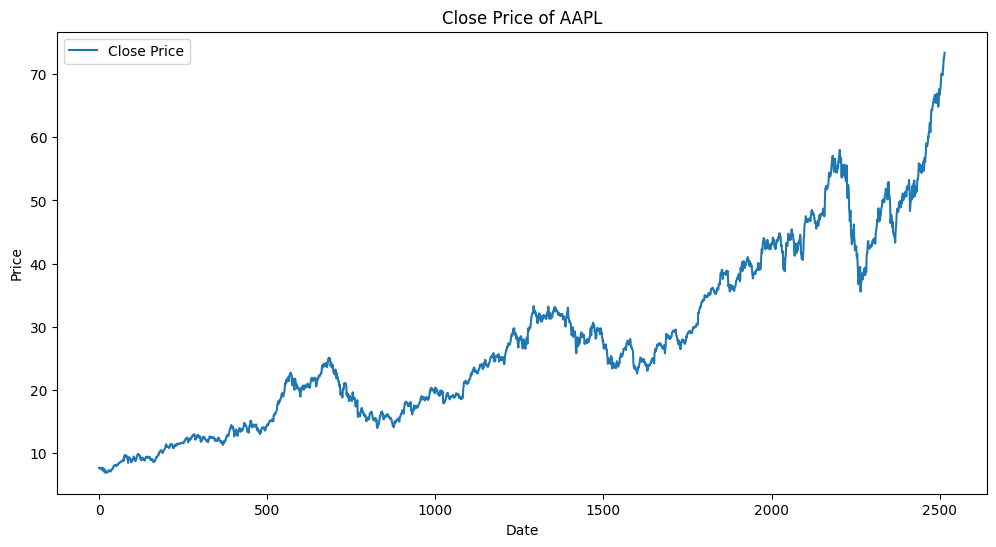

In [8]:
# Plotting the Close price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# Calculating moving averages
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

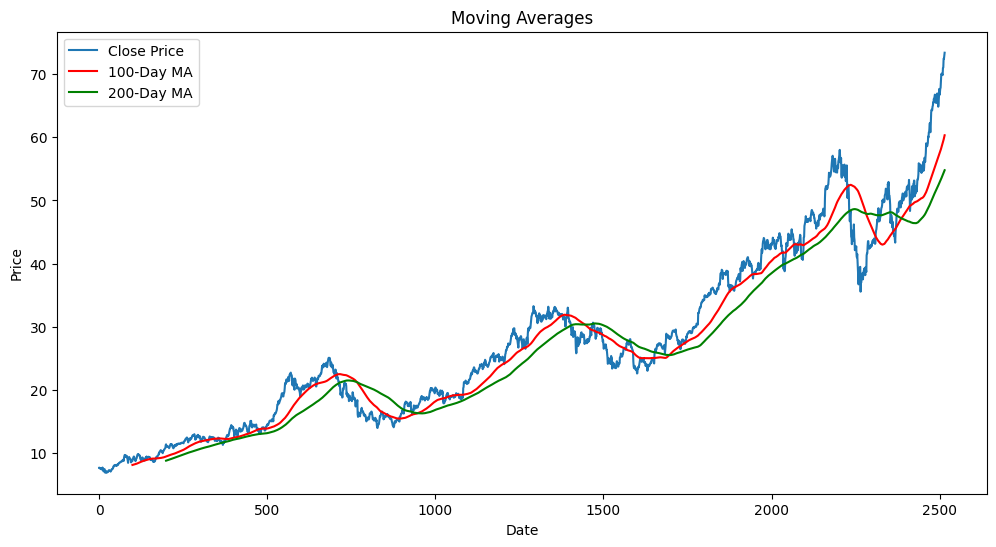

In [10]:
# Plotting moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.plot(ma200, 'g', label='200-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(f'Training Data Shape: {data_training.shape}')
print(f'Testing Data Shape: {data_testing.shape}')

Training Data Shape: (1761, 1)
Testing Data Shape: (755, 1)


In [12]:
# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [13]:
# Creating the training dataset
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# Building the Sequential model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/Users/seflame/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling and training the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.1340
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0142
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0108
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0099
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0110
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0098
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0101
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0091
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0083
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0082
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0075
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0081
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0075
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0083
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0071
Epoc

In [17]:
# Save the model
model.save('keras_model.h5')

In [18]:
# Testing the model
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [19]:
# Testing the model
data_testing.tail()

,Close
2511,71.067497
2512,72.477501
2513,72.449997
2514,72.879997
2515,73.412498


In [20]:
# Preparing the final dataset for testing
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

input_data = scaler.fit_transform(final_df)

In [21]:
# Creating the testing dataset
x_test = []
y_test = []
for i in range(100, input_data.shape[0]): 
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)

In [22]:
# Making predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [23]:
# Inverse scaling the predictions
scale_factor = 1 / scaler.scale_[0]  # The scale factor for inverse transformation
y_predicted = y_predicted * scale_factor
y_test = np.array(y_test) * scale_factor

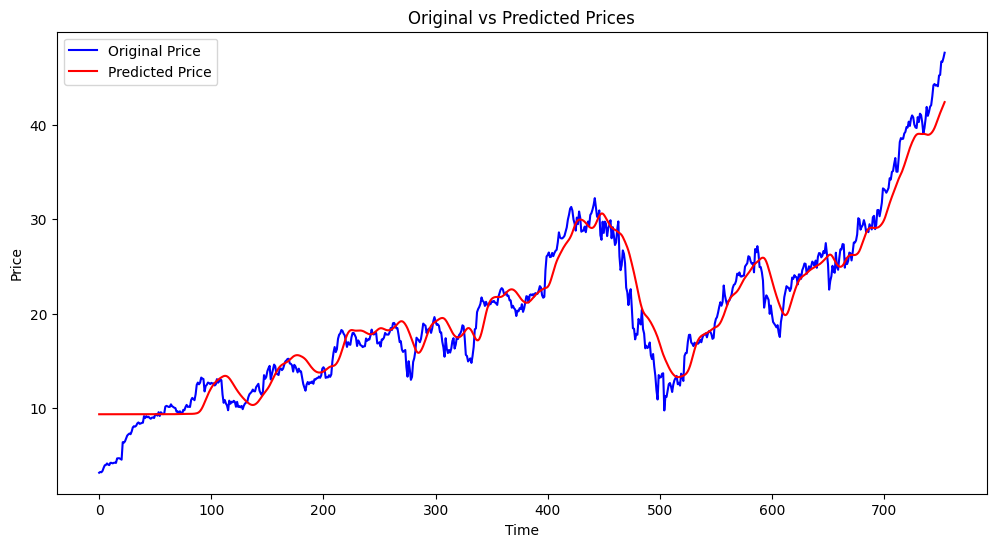

In [24]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', color='blue')
plt.plot(y_predicted, label='Predicted Price', color='red')
plt.title('Original vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()